In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data.csv', encoding='latin1')
df=df.drop_duplicates()
df=df.dropna()
df.head(2)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105


In [4]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [5]:
a=df[df['sentiment'] == 'positive']
df1=pd.DataFrame(a)
print('Positive samples: ',a.shape)
b=df[df['sentiment'] == 'negative']
df2=pd.DataFrame(b)
print('Negative samples: ',b.shape)
c=df[df['sentiment'] == 'neutral']
df3=pd.DataFrame(c)
print('Neutral samples: ',c.shape)

Positive samples:  (8582, 10)
Negative samples:  (7781, 10)
Neutral samples:  (11117, 10)


In [8]:
df1=df1[:7780]
df2=df2[:7780]
df3=df3[:7780]
df = pd.concat([df1, df2,df3])
df.head(2)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [9]:
x=df.iloc[:,2]
y=df.iloc[:,3]

In [10]:
x

6                                                      fun
9                             Wow... u just became cooler.
11                                                    like
21                                            interesting.
25       the free fillin` app on my ipod is fun, im add...
                               ...                        
19280                                   One more day baby.
19286    has opted to strike, May 12th - Altaf bhai to ...
19288                                 i have nothing to do
19289                      no, dayuuum 5o`clock was better
19290    anytime from now on lol. i`m just reading and ...
Name: selected_text, Length: 23340, dtype: object

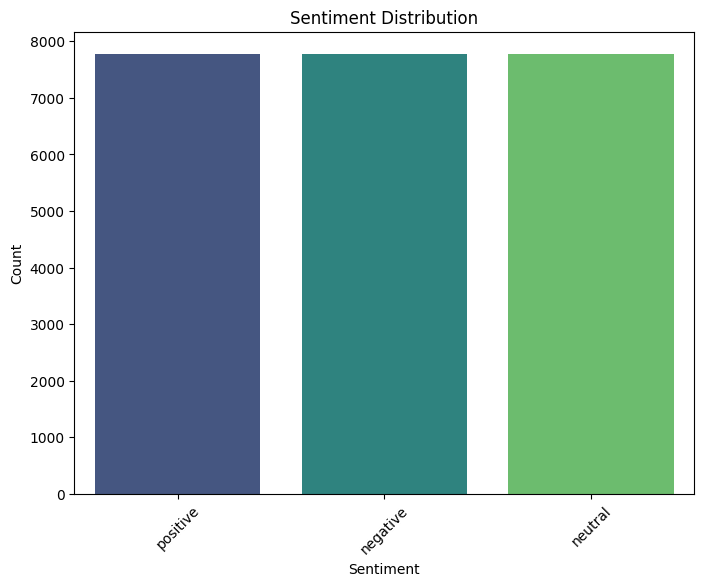

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


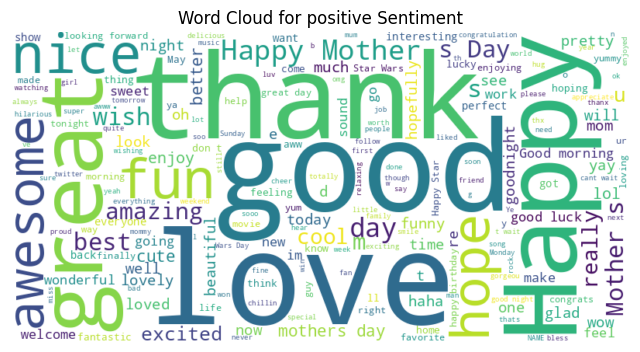

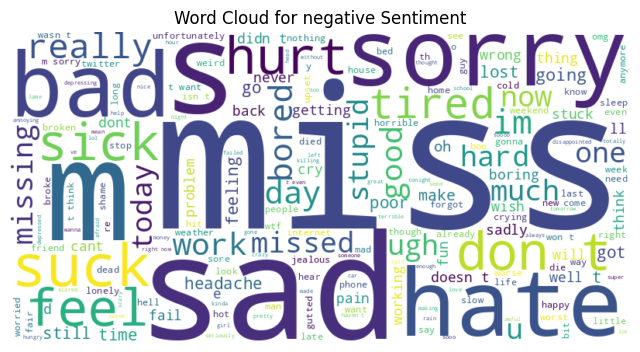

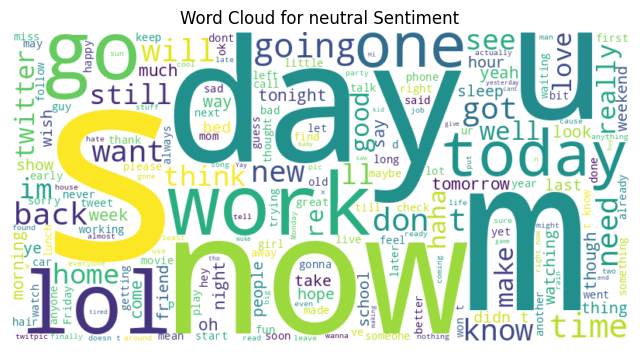

In [13]:
from wordcloud import WordCloud

# Create word clouds for each sentiment category
sentiments = df['sentiment'].unique()

for sentiment in sentiments:
    text = ' '.join(df[df['sentiment'] == sentiment]['selected_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


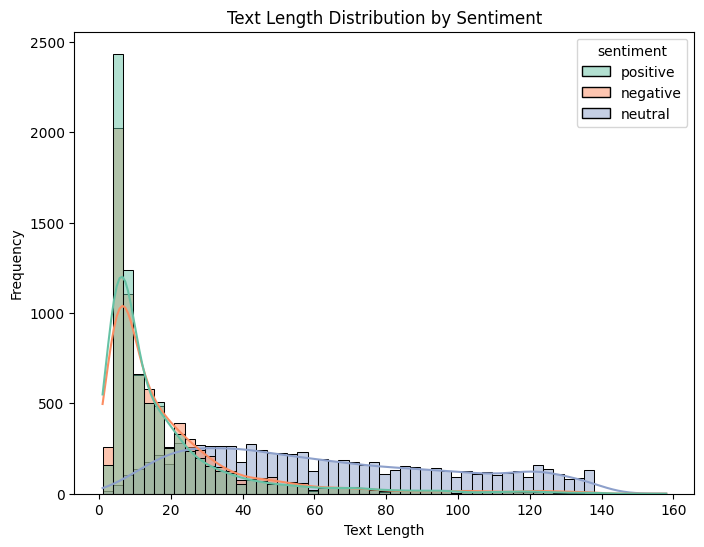

In [14]:
# Create a histogram of text lengths for each sentiment category
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['selected_text'].str.len(), hue='sentiment', kde=True, palette='Set2')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
def clean_html(text):
    clean = re.compile("<.*?>")
    return re.sub(clean, "", text)

# Apply clean_html to the 'text' column
df["selected_text"] = df["selected_text"].apply(clean_html)

In [16]:
def convert_lower(text):
    return text.lower()

# Apply convert_lower to the 'text' column
df["selected_text"] = df["selected_text"].apply(convert_lower)

In [17]:
def remove_special(text):
    clean_text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    return clean_text

# Apply remove_special to the 'text' column
df["selected_text"] = df["selected_text"].apply(remove_special)

In [18]:
nltk.download('stopwords')

def remove_stopwords(text):
    stopwords_list = stopwords.words("english")
    tokens = text.split()
    clean_tokens = [token for token in tokens if token not in stopwords_list]
    return " ".join(clean_tokens)

# Apply remove_stopwords to the 'text' column
df["selected_text"] = df["selected_text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
x=df['selected_text']
x

6                                                      fun
9                                      wow u became cooler
11                                                    like
21                                             interesting
25                    free fillin app ipod fun im addicted
                               ...                        
19280                                         one day baby
19286    opted strike may 12th altaf bhai unveil really...
19288                                              nothing
19289                              dayuuum 5o clock better
19290                           anytime lol reading stuffs
Name: selected_text, Length: 23340, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [21]:
y_train.shape

(18672,)

In [22]:
import sklearn.preprocessing as pre
enc=pre.OneHotEncoder()
y_train=enc.fit_transform(np.c_[y_train]).toarray()
y_train
y_test=enc.fit_transform(np.c_[y_test]).toarray()
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# Convert tweets to a vector representation
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [27]:
X_train.shape

(18672, 12694)

In [28]:
import sklearn.metrics as sm
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='classifier')
model_name=[]
model_precision=[]
model_acc=[]
for name, get_model in estimators:
    try:
        model = get_model()
        model.fit(X_train,y_train)
        pred_y=model.predict(X_test)
        #sm.precision_score(test_y, pred_y)
        model_precision.append(sm.precision_score(y_test, pred_y, average=None))
        model_acc.append(accuracy_score(y_test, pred_y))
        model_name.append(name)
    except Exception as e:
        print('Unable to import', name)
        print(e)

Unable to import AdaBoostClassifier
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import BaggingClassifier
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import BernoulliNB
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import CalibratedClassifierCV
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import CategoricalNB
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Unable to import ComplementNB
y should be a 1d array, got an array of shape (18672, 3) instead.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Unable to import GaussianNB
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import GaussianProcessClassifier
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import GradientBoostingClassifier
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import HistGradientBoostingClassifier
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import LabelPropagation
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import LabelSpreading
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import LinearDiscriminantAnalysis
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import LinearSVC
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import LogisticRegression
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import LogisticRegressionCV
y should be a 1d array, got an a

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Unable to import MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import MultinomialNB
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import NearestCentroid
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import NuSVC
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import OneVsOneClassifier
OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OneVsRestClassifier
OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OutputCodeClassifier
OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import PassiveAggressiveClassifier
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import Perceptron
y should be a 1d array, got an array of shape (18672, 3) instead.
Unable to import Quadratic

In [30]:
results=pd.DataFrame({"Model Name":model_name , "Model accuracy":model_acc,'Model Precision':model_precision})
results

,Model Name,Model accuracy,Model Precision
0,DecisionTreeClassifier,0.717224,"[0.6974272930648769, 0.7380330722367275, 0.767..."
1,DummyClassifier,0.000000,"[0.0, 0.0, 0.0]"
2,ExtraTreeClassifier,0.687875,"[0.6631411951348493, 0.7190795781399808, 0.737..."
3,ExtraTreesClassifier,0.709297,"[0.7326732673267327, 0.786463298379409, 0.8127..."
4,KNeighborsClassifier,0.633248,"[0.614010989010989, 0.7709611451942741, 0.7160..."
5,MLPClassifier,0.714439,"[0.7436670687575392, 0.7406866325785245, 0.797..."
6,RandomForestClassifier,0.706298,"[0.7314923619271445, 0.791907514450867, 0.8033..."
7,RidgeClassifier,0.654884,"[0.7903804737975593, 0.8030713640469738, 0.808..."
8,RidgeClassifierCV,0.624250,"[0.862796833773087, 0.8188608776844071, 0.8550..."


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [32]:
y_pred = rf_classifier.predict(X_test)

In [33]:
y_test.shape

(4668, 3)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7086546700942588


In [35]:
import sklearn.metrics as sm
a=sm.precision_score(y_test, y_pred, average=None)
a

array([0.73501763, 0.79440154, 0.80706344])

In [36]:
import pickle

# Save your trained model to a file
with open('model_sentiment_ML.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
